#  Lab 1



##  Hand-Written Digit Recognition

In [50]:
# core
import numpy as np
import pandas as df
import matplotlib.pyplot as plt

# estimator algos
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# metrics & preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score # For evaluating model performance


# data
from sklearn.datasets import load_digits


<h1>Import Digits Data</h1>

In [20]:
digits = load_digits()

<h1>See what they look like</h1>

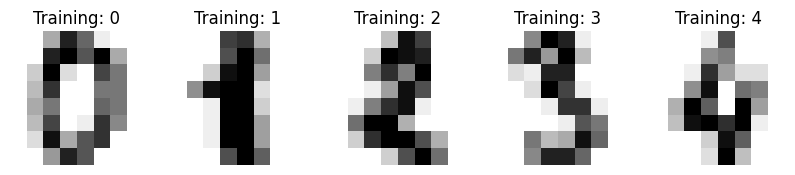

In [21]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

<h1>Question 0</h1>

Split the digits.data and digits.target into train and test data. Create a dummy classifier for the digits data, with a strategy of "most_frequent", and print the score on test data. 

In [22]:
(
    X_train, 
    X_test, 
    y_train, 
    y_test
) = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# random state - for reproducable results when repeating
# requirement for the distribution will be the same when splitting data set. Same distribution of target values within both training af test data.

In [23]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0).fit(X_train, y_train)

In [24]:
unique, counts = np.unique(y_train, return_counts=True)
value_counts = np.asarray((unique, counts)).T
value_counts[value_counts[:, 1].argsort()] 
# .. which means that the predicted class will be 4

array([[  8, 126],
       [  6, 129],
       [  7, 131],
       [  2, 133],
       [  9, 133],
       [  5, 134],
       [  3, 138],
       [  1, 139],
       [  0, 141],
       [  4, 143]])

In [25]:
pred_most_freq = dummy_clf.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_freq)))
print("Test score: {:.2f}".format(dummy_clf.score(X_test, y_test)))

Unique predicted labels: [4]
Test score: 0.08


In [26]:

print(metrics.classification_report(y_test, dummy_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        45
           4       0.08      1.00      0.16        38
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        52
           7       0.00      0.00      0.00        48
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00        47

    accuracy                           0.08       450
   macro avg       0.01      0.10      0.02       450
weighted avg       0.01      0.08      0.01       450



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1>Question 1</h1>
Create a logistic regression model for the digits data and print the score on test data. Use metrics.classification_report to give a more detailed report of results.

In [27]:
lr_clf = LogisticRegression(
    random_state=0, 
    max_iter=10,
    solver='lbfgs', 
    multi_class='auto'
).fit(X_train, y_train)

# Predicting y 
pred_y = lr_clf.predict(X_test)

# Test score
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred_y)))

Accuracy: 0.958


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
print(metrics.classification_report(y_test, pred_y))

ValueError: Found input variables with inconsistent numbers of samples: [360, 450]

In [52]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(X_test, pred_y)
disp.figure_.suptitle("Confustion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

ValueError: Mix type of y not allowed, got types {'multiclass-multioutput', 'multiclass'}

<h1>Question 2</h1>
Create a 3-way split of the data, using train_test_split. First split into trainval and test, and then split trainval into train and val. 

In [53]:
(
    X_trainval, 
    X_test, 
    y_trainval, 
    y_test
) = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)

# Split train-val set into training and validaiton sets
(
    X_train,
    X_val,
    y_train,
    y_val
) = train_test_split(X_trainval, y_trainval, test_size=0.20, random_state=0)

print(X_trainval.shape, y_trainval.shape, X_test.shape, y_test.shape,)

(1437, 64) (1437,) (360, 64) (360,)


<h1>Question 3</h1>
Create a logistic regression classifier for the digits data. Write a loop that tries at least 4 values ranging from .001 to 1.0 for C. Use the val data to determine the best value. Then train on the combined train and val data, and score the resulting model on test. Use metrics.ConfusionMatrixDisplay.from_predictions to display a confusion matrix for all 10 classes. 

In [54]:
best_score = 0

for C in [0.001, 0.01, .02, .05, 1.0]:
    lr = LogisticRegression(C=C, solver='lbfgs', multi_class='auto', max_iter=10000)
    # Training model on training set 
    lr.fit(X_train, y_train)
    # evaluate model on the validation set
    score = lr.score(X_val, y_val)
    # if we got a better score, store the score and parameters
    if score > best_score: 
        best_score = score
        best_parameters = {'C': C, 'solver':'lbfgs', 'multi_class':'auto', 'max_iter':10000}
        
# rebuild model on the combines training and validaiton set
# and evaluate it on the test set
lr = LogisticRegression(**best_parameters)
lr.fit(X_trainval, y_trainval)
test_score = lr.score(X_test, y_test)

# Printing scores
print("Best score on validation set: {:.3f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.3f}".format(test_score))
    

Best score on validation set: 0.983
Best parameters:  {'C': 0.01, 'solver': 'lbfgs', 'multi_class': 'auto', 'max_iter': 10000}
Test set score with best parameters: 0.961


In [55]:
# Method 2
train_accs, val_accs, c_ = [], [], []

for i in (10**-i_ for i_ in range(4)):
    lr_clf = LogisticRegression(C=i, max_iter=10000).fit(X_train, y_train)
    
    train_acc = metrics.accuracy_score(y_train, lr_clf.predict(X_train))
    print(f"C={i}, Train accuracy={train_acc}")
    train_accs.append(train_acc)

    val_acc = metrics.accuracy_score(y_val, lr_clf.predict(X_val))
    print(f"C={i}, Validation accuracy={val_acc}\n")
    val_accs.append(val_acc)

    c_.append(i)

C=1, Train accuracy=1.0
C=1, Validation accuracy=0.9722222222222222

C=0.1, Train accuracy=1.0
C=0.1, Validation accuracy=0.9756944444444444

C=0.01, Train accuracy=0.9947780678851175
C=0.01, Validation accuracy=0.9826388888888888

C=0.001, Train accuracy=0.9660574412532638
C=0.001, Validation accuracy=0.96875



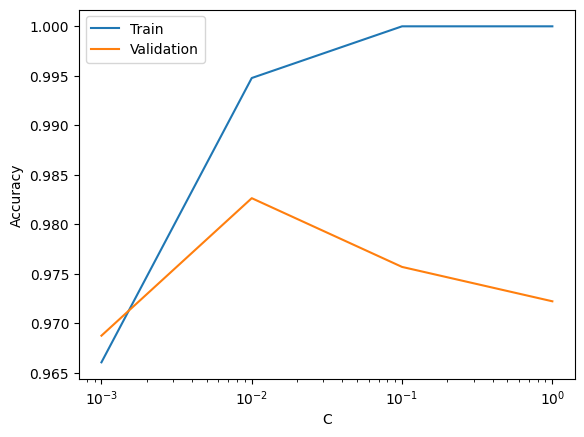

In [56]:
# Plot the accuracy of the model on the training and validation sets (y axus) with respect to the regularization parameter c in list c_ (x axis)
plt.plot(c_, train_accs, label='Train')
plt.plot(c_, val_accs, label='Validation')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
# set y axis range
# plt.ylim(0, 1.0)

In [57]:
lr_clf = LogisticRegression(C=0.01, max_iter=10000).fit(X_trainval, y_trainval)
y_pred = lr_clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.91      0.91        35
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        29
           4       0.94      0.97      0.95        30
           5       0.97      0.95      0.96        40
           6       0.98      0.98      0.98        44
           7       0.97      0.95      0.96        39
           8       0.95      0.92      0.94        39
           9       0.93      0.95      0.94        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



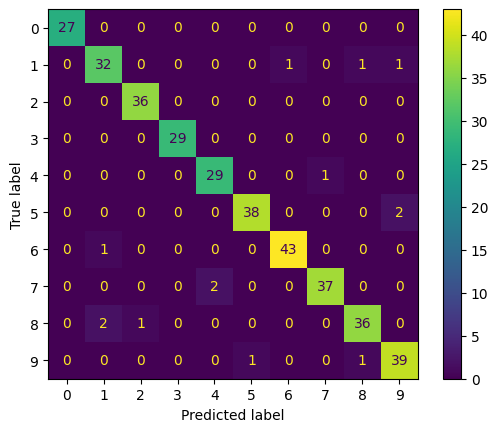

In [58]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

<h1>Question 4</h1>
Create a Decision Tree classifier for the digits data. Write a loop that tries values of 1 through 20 for maximum depth. Use the val data to determine the best value. 

In [59]:
# method 1
best_score = 0

for depth in range(1,21):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    # Training model on training set 
    tree.fit(X_train, y_train)
    # evaluate model on the validation set
    score = tree.score(X_val, y_val)
    # if we got a better score, store the score and parameters
    if score > best_score: 
        best_score = score
        best_parameters = {'max_depth': depth, 'random_state':0}
        
    

In [60]:
# method 2
train_accs, val_accs = [], []
for i in range(1, 20):
    dt_clf = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)

    train_acc = metrics.accuracy_score(y_train, dt_clf.predict(X_train))
    print(f"Max depth={i}, Train accuracy={train_acc}")
    train_accs.append(train_acc)

    val_acc = metrics.accuracy_score(y_val, dt_clf.predict(X_val))
    print(f"Max depth={i}, Validation accuracy={val_acc}\n")
    val_accs.append(val_acc)

Max depth=1, Train accuracy=0.20887728459530025
Max depth=1, Validation accuracy=0.20833333333333334

Max depth=2, Train accuracy=0.3307223672758921
Max depth=2, Validation accuracy=0.28125

Max depth=3, Train accuracy=0.4934725848563969
Max depth=3, Validation accuracy=0.4513888888888889

Max depth=4, Train accuracy=0.6118363794604004
Max depth=4, Validation accuracy=0.5486111111111112

Max depth=5, Train accuracy=0.7580504786771105
Max depth=5, Validation accuracy=0.7118055555555556

Max depth=6, Train accuracy=0.835509138381201
Max depth=6, Validation accuracy=0.7534722222222222

Max depth=7, Train accuracy=0.9042645778938208
Max depth=7, Validation accuracy=0.8194444444444444

Max depth=8, Train accuracy=0.9329852045256745
Max depth=8, Validation accuracy=0.8506944444444444

Max depth=9, Train accuracy=0.9625761531766753
Max depth=9, Validation accuracy=0.8472222222222222

Max depth=10, Train accuracy=0.9773716275021758
Max depth=10, Validation accuracy=0.84375

Max depth=11, Train

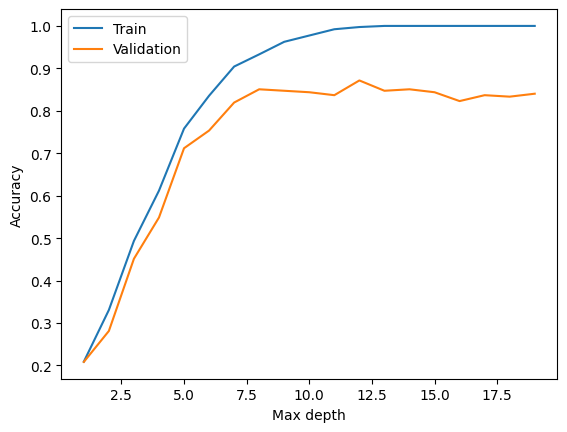

In [61]:
plt.plot(range(1, 20), train_accs, label='Train')
plt.plot(range(1, 20), val_accs, label='Validation')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()

<h1>Question 5</h1>
Now train the best decision tree model on the combined train and val data, and score the resulting model on test.  
Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.


In [62]:
# method 1

# rebuild model on the combines training and validaiton set
# and evaluate it on the test set
tree = DecisionTreeClassifier(**best_parameters)
tree.fit(X_trainval, y_trainval)
test_score = tree.score(X_test, y_test)

# Printing scores
print("Best score on validation set: {:.3f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.3f}".format(test_score))

Best score on validation set: 0.854
Best parameters:  {'max_depth': 11, 'random_state': 0}
Test set score with best parameters: 0.864


In [63]:
# method 2
dt_clff = DecisionTreeClassifier(max_depth=16).fit(X_trainval, y_trainval)
y_pred = dt_clff.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.91      0.83      0.87        35
           2       0.84      0.86      0.85        36
           3       0.66      0.93      0.77        29
           4       0.87      0.87      0.87        30
           5       0.85      0.85      0.85        40
           6       0.95      0.93      0.94        44
           7       0.95      0.95      0.95        39
           8       0.93      0.69      0.79        39
           9       0.79      0.80      0.80        41

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.85       360
weighted avg       0.87      0.86      0.86       360



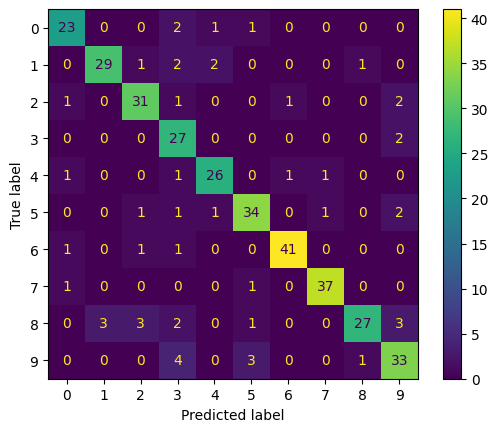

In [64]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

<h1>Question 6</h1>
Create a Random Forest classifier for the digits data. Use the val data to determine the best values for 
<ul>
    <li>number of estimators (from 50 to 500 by 50s)</li>
    <li>Max depth (from 10 to 50 by 10s)</li>
    </ul>
        

In [65]:
# method 1

rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

best_score = 0

for n in range(50, 501,50):
    for d in range(10,51,10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=0)
        # Training model on training set 
        rf.fit(X_train, y_train)
        # evaluate model on the validation set
        score = rf.score(X_val, y_val)
        # if we got a better score, store the score and parameters
        if score > best_score: 
            best_score = score
            best_parameters = {'n_estimators':n, 'max_depth':d, 'random_state':0}
        
    

In [66]:
# method 2
for n_estimators in range(50, 500, 50):
    for max_depth in range(10, 50, 10):
        rf_clf = RandomForestClassifier(n_estimators=100, max_depth=16).fit(X_train, y_train)
        train_acc = metrics.accuracy_score(y_train, rf_clf.predict(X_train))
        print(f"n_estimators={n_estimators}, max_depth={max_depth}, Train accuracy={train_acc}")

        val_acc = metrics.accuracy_score(y_val, rf_clf.predict(X_val))
        print(f"n_estimators={n_estimators}, max_depth={max_depth}, Validation accuracy={val_acc}\n")


n_estimators=50, max_depth=10, Train accuracy=1.0
n_estimators=50, max_depth=10, Validation accuracy=0.9826388888888888

n_estimators=50, max_depth=20, Train accuracy=1.0
n_estimators=50, max_depth=20, Validation accuracy=0.9826388888888888

n_estimators=50, max_depth=30, Train accuracy=1.0
n_estimators=50, max_depth=30, Validation accuracy=0.9826388888888888

n_estimators=50, max_depth=40, Train accuracy=1.0
n_estimators=50, max_depth=40, Validation accuracy=0.9895833333333334

n_estimators=100, max_depth=10, Train accuracy=1.0
n_estimators=100, max_depth=10, Validation accuracy=0.9791666666666666

n_estimators=100, max_depth=20, Train accuracy=1.0
n_estimators=100, max_depth=20, Validation accuracy=0.9861111111111112

n_estimators=100, max_depth=30, Train accuracy=1.0
n_estimators=100, max_depth=30, Validation accuracy=0.9861111111111112

n_estimators=100, max_depth=40, Train accuracy=1.0
n_estimators=100, max_depth=40, Validation accuracy=0.9861111111111112

n_estimators=150, max_de

<h1>Question 7</h1>
Now train the best random forest model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

In [67]:
# method 1

# rebuild model on the combines training and validaiton set
# and evaluate it on the test set
rf = RandomForestClassifier(**best_parameters)
rf.fit(X_trainval, y_trainval)
test_score = rf.score(X_test, y_test)

# Printing scores
print("Best score on validation set: {:.3f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.3f}".format(test_score))

Best score on validation set: 0.990
Best parameters:  {'n_estimators': 100, 'max_depth': 20, 'random_state': 0}
Test set score with best parameters: 0.969


In [68]:
# method 2
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=20).fit(X_trainval, y_trainval)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.97      1.00      0.99        35
           2       1.00      0.94      0.97        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.92      0.96        39
           9       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.98      0.97       360
weighted avg       0.98      0.97      0.97       360



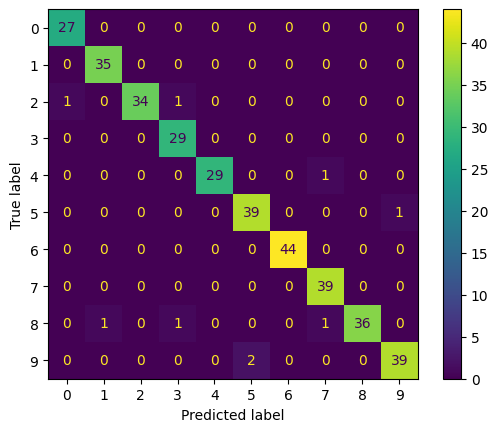

In [69]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, rf_clf.predict(X_test))
print(classification_report(y_test, rf_clf.predict(X_test)))

# <h1>Question 8</h1>
Create a MLP classifier for the digits data. Use the val data to determine the best values for 
hidden layer sizes. Try values from (10,10) to (210,210), increasing by 50s. You can use two nested loops for variables H1 and H2, and then assign (H1,H2) to the parameter hidden_layer_sizes.
<p> Print the best values for the two hidden layer sizes</p>
    
        

In [70]:
# method 1

best_score = 0

for H1 in range(10, 210, 50):
    for H2 in range(10, 210, 50):
        mlp = MLPClassifier(hidden_layer_sizes=(H1,H2), max_iter=1000, random_state=0)
        # Training model on training set 
        mlp.fit(X_train, y_train)
        # evaluate model on the validation set
        score = mlp.score(X_val, y_val)
        # if we got a better score, store the score and parameters
        if score > best_score: 
            best_score = score
            best_parameters = {'hidden_layer_sizes':(H1,H2), 'max_iter':1000, 'random_state':0}
        
    print("Best Hidden Layer Sizes:", best_parameters['hidden_layer_sizes'])

Best Hidden Layer Sizes: (10, 160)
Best Hidden Layer Sizes: (60, 10)
Best Hidden Layer Sizes: (60, 10)
Best Hidden Layer Sizes: (160, 60)


In [71]:
# method 2
for h1 in range(10, 210, 50):
    for h2 in range(10, 210, 50):
        mlp_clf = MLPClassifier(hidden_layer_sizes=(h1, h2), max_iter=1000).fit(X_train, y_train)
        print(f"Hidden layer sizes={h1, h2}, Train accuracy={metrics.accuracy_score(y_train, mlp_clf.predict(X_train))}")
        print(f"Hidden layer sizes={h1, h2}, Validation accuracy={metrics.accuracy_score(y_val, mlp_clf.predict(X_val))}\n")

Hidden layer sizes=(10, 10), Train accuracy=1.0
Hidden layer sizes=(10, 10), Validation accuracy=0.9513888888888888

Hidden layer sizes=(10, 60), Train accuracy=1.0
Hidden layer sizes=(10, 60), Validation accuracy=0.9826388888888888

Hidden layer sizes=(10, 110), Train accuracy=1.0
Hidden layer sizes=(10, 110), Validation accuracy=0.96875

Hidden layer sizes=(10, 160), Train accuracy=1.0
Hidden layer sizes=(10, 160), Validation accuracy=0.9791666666666666

Hidden layer sizes=(60, 10), Train accuracy=1.0
Hidden layer sizes=(60, 10), Validation accuracy=0.9618055555555556

Hidden layer sizes=(60, 60), Train accuracy=1.0
Hidden layer sizes=(60, 60), Validation accuracy=0.9791666666666666

Hidden layer sizes=(60, 110), Train accuracy=1.0
Hidden layer sizes=(60, 110), Validation accuracy=0.9826388888888888

Hidden layer sizes=(60, 160), Train accuracy=1.0
Hidden layer sizes=(60, 160), Validation accuracy=0.9930555555555556

Hidden layer sizes=(110, 10), Train accuracy=1.0
Hidden layer sizes

<h1>Question 9</h1>

Now train the best mlp model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

In [72]:
# method 1

# rebuild model on the combines training and validaiton set
# and evaluate it on the test set
mlp = MLPClassifier(**best_parameters)
mlp.fit(X_trainval, y_trainval)
test_score = mlp.score(X_test, y_test)

# Printing scores
print("Best score on validation set: {:.3f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.3f}".format(test_score))

Best score on validation set: 0.990
Best parameters:  {'hidden_layer_sizes': (160, 60), 'max_iter': 1000, 'random_state': 0}
Test set score with best parameters: 0.981


In [73]:
# method 2
mlp_clf = MLPClassifier(hidden_layer_sizes=(160, 60), max_iter=1000).fit(X_trainval, y_trainval)
y_pred = mlp_clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        30
           5       0.95      0.97      0.96        40
           6       1.00      0.98      0.99        44
           7       1.00      1.00      1.00        39
           8       1.00      0.97      0.99        39
           9       0.98      0.98      0.98        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



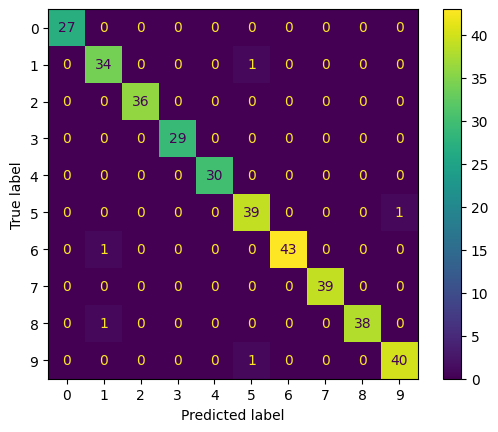

In [74]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        30
           5       0.95      0.97      0.96        40
           6       1.00      0.98      0.99        44
           7       1.00      1.00      1.00        39
           8       1.00      0.97      0.99        39
           9       0.98      0.98      0.98        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



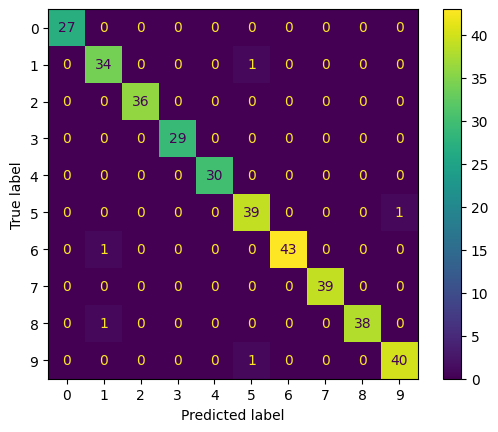

In [75]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))